In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GRU, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [14]:
# MAE
CNN = []
LSTM = []
CNN_LSTM = []

In [15]:
CNN = [1004.2577906008783, 1012.326218467387, 602.6630661090179, 4055.3768159562624, 962.170216889681, 505.9291416948933, 206.5616387895441]
LSTM = [276.3388503723861, 152.28063164947145, 116.83844822311352, 94.87554430386312, 114.1719337482164, 74.96156140104162, 69.69154912400212]
CNN_LSTM = [285.59840981382683, 176.7387551548825, 63.18634998680596, 96.5848542199105, 117.98366420440634, 78.17271982175876, 58.10905998391384]

In [16]:
print(CNN_LSTM)

[285.59840981382683, 176.7387551548825, 63.18634998680596, 96.5848542199105, 117.98366420440634, 78.17271982175876, 58.10905998391384]


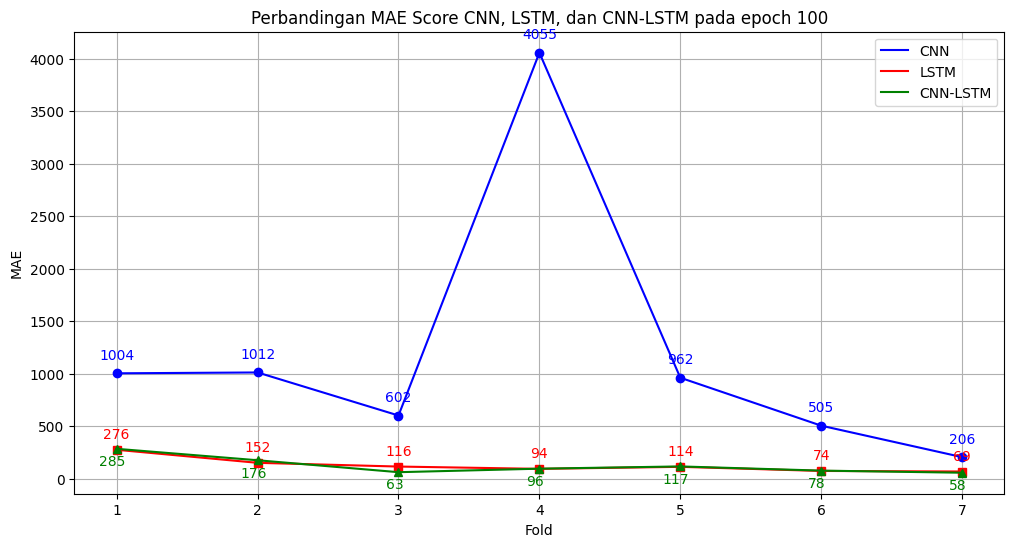

In [17]:
# Folds
folds = np.arange(1, len(CNN) + 1)

# Plotting
plt.figure(figsize=(12, 6))

# Plot CNN
cnn_folds, cnn_scores = [], []
for i in range(len(CNN)):
    if CNN[i] <= 3000000:
        plt.plot(folds[i], CNN[i], 'bo')
        plt.annotate(f'{int(CNN[i])}', (folds[i], CNN[i]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
        cnn_folds.append(folds[i])
        cnn_scores.append(CNN[i])

plt.plot(cnn_folds, cnn_scores, 'b-', label='CNN')

# Plot LSTM
lstm_folds, lstm_scores = [], []
for i in range(len(LSTM)):
    if LSTM[i] <= 3000000:
        plt.plot(folds[i], LSTM[i], 'rs')
        plt.annotate(f'{int(LSTM[i])}', (folds[i], LSTM[i]), textcoords="offset points", xytext=(0,8), ha='center', color='red')
        lstm_folds.append(folds[i])
        lstm_scores.append(LSTM[i])

plt.plot(lstm_folds, lstm_scores, 'r-', label='LSTM')

# Plot CNN-LSTM
cnn_lstm_folds, cnn_lstm_scores = [], []
for i in range(len(CNN_LSTM)):
    if CNN_LSTM[i] <= 3000000:
        plt.plot(folds[i], CNN_LSTM[i], 'g^')
        plt.annotate(f'{int(CNN_LSTM[i])}', (folds[i], CNN_LSTM[i]), textcoords="offset points", xytext=(-3,-12), ha='center', color='green')
        cnn_lstm_folds.append(folds[i])
        cnn_lstm_scores.append(CNN_LSTM[i])

plt.plot(cnn_lstm_folds, cnn_lstm_scores, 'g-', label='CNN-LSTM')


plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('Perbandingan MAE Score CNN, LSTM, dan CNN-LSTM pada epoch 100')
plt.yscale('linear')  # Use linear scale for R2 score
plt.legend()
plt.grid(True)

# Show the plot
plt.show()